In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns

In [2]:
#Import the data as a pandas DataFrame.

df = pd.read_csv('data.csv')

In [3]:
#checking if the imported data looks like from head and from end
df.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


In [4]:
#and from tail 
df.tail()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific
149,Sierra Leone,106,4.709,0.368421,0.984136,0.005565,0.318698,0.293041,0.071095,2.668460,59.2,Africa
150,Turkey,69,5.500,1.198274,1.337753,0.637606,0.300741,0.046693,0.099672,1.879278,74.9,Asia-Pacific
151,Sri Lanka,120,4.440,1.009850,1.259976,0.625131,0.561213,0.490864,0.073654,0.419389,84.4,Asia-Pacific
152,Russia,49,5.963,1.281778,1.469282,0.547349,0.373783,0.052264,0.032963,2.205607,74.6,Eastern Europe


In [5]:
#checking the number of observations by looking at index, columns and summary info (see below)
df.index

RangeIndex(start=0, stop=153, step=1)

In [6]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [7]:
# Check the data type for each column
#Looks like the values in each column are of the same type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


In [8]:
# Check if there are any missing values.
# Job satisfaction has got 2 missing values
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

In [9]:
# Let's check which exactly rows contain cells with those missing values:
df[df.isnull().any(axis=1)]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
43,North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
61,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


In [10]:
#If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.

df.dropna(axis=0,how='any', inplace=True)

In [11]:
# checking if it worked correctly
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

In [12]:
df[df.isnull().any(axis=1)]


,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region


In [13]:
# Obtain the mean, minimum and maximum value for each column containing numerical data.
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [14]:
df.mean()

Happiness Rank      77.827815
Happiness Score      5.357874
Economy              0.983895
Family               1.190509
Health               0.550794
Freedom              0.409805
Generosity           0.244914
Corruption           0.123008
Dystopia             1.854910
Job Satisfaction    75.209934
dtype: float64

In [15]:
df.min()

Country             Afghanistan
Happiness Rank                1
Happiness Score           2.693
Economy                       0
Family                        0
Health                        0
Freedom                       0
Generosity                    0
Corruption                    0
Dystopia               0.377914
Job Satisfaction           44.4
Region                   Africa
dtype: object

In [16]:
df.max()

Country                   Zimbabwe
Happiness Rank                 155
Happiness Score              7.537
Economy                    1.87077
Family                     1.61057
Health                    0.949492
Freedom                   0.658249
Generosity                0.838075
Corruption                0.464308
Dystopia                   3.11748
Job Satisfaction              95.1
Region              Western Europe
dtype: object

In [17]:
# List the 10 happiest countries.
df.sort_values('Happiness Rank').head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


In [18]:
# List the 10 least happy countries.
df.sort_values('Happiness Rank', ascending=False).head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America


In [19]:
# List the 10 least happy countries.
# OR another way
df.sort_values('Happiness Rank').tail(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa


In [20]:
# Group the data points by region and save them into separate .csv files ex. a Western Europe.csv with all the data for countries in Western Europe and so on for the other 5 regions.
df2=df.groupby(['Region']).groups
for i in df2.keys():
    # filename=i+'.csv'
    # print(filename)
    df[df.Region==i].to_csv(i+'.csv')
# Since, it was not indicated in the assignment, I did not reset the index, though it might make sense for future analysis

In [21]:
for i in df2.keys():
    print(i)

Africa
Asia-Pacific
Eastern Europe
Europe
Latin America
North America
Western Europe


In [22]:
# Compute the mean happiness score for each region and rank the regions from most happy to least happy.
df.groupby(['Region'])['Happiness Score'].mean().sort_values(ascending=False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.498952
Asia-Pacific      5.358326
Africa            4.254581
Europe            4.096000
Name: Happiness Score, dtype: float64

In [23]:
#Compute the number of countries in each region that have a happiness score above 6.0.
df[df['Happiness Score']>6].groupby(['Region'])['Country'].count()

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
Name: Country, dtype: int64

In [24]:
# Compute the difference between the maximum and minimum happiness score for each region. 
df.groupby(['Region'])['Happiness Score'].max()-df.groupby(['Region'])['Happiness Score'].min()

Region
Africa            3.179
Asia-Pacific      3.852
Eastern Europe    1.454
Europe            0.000
Latin America     3.476
North America     0.323
Western Europe    2.342
Name: Happiness Score, dtype: float64

In [25]:
#Which region has the largest range of happiness scores?
(df.groupby(['Region'])['Happiness Score'].max()-df.groupby(['Region'])['Happiness Score'].min()).sort_values(ascending=False).head(1)

Region
Asia-Pacific    3.852
Name: Happiness Score, dtype: float64

In [26]:
df.groupby(['Region'])['Happiness Score'].max()-df.groupby(['Region'])['Happiness Score'].min()

Region
Africa            3.179
Asia-Pacific      3.852
Eastern Europe    1.454
Europe            0.000
Latin America     3.476
North America     0.323
Western Europe    2.342
Name: Happiness Score, dtype: float64

In [27]:
(df.groupby(['Region'])['Happiness Score'].max()-df.groupby(['Region'])['Happiness Score'].min()).sort_values(ascending=False)

Region
Asia-Pacific      3.852
Latin America     3.476
Africa            3.179
Western Europe    2.342
Eastern Europe    1.454
North America     0.323
Europe            0.000
Name: Happiness Score, dtype: float64

No handles with labels found to put in legend.


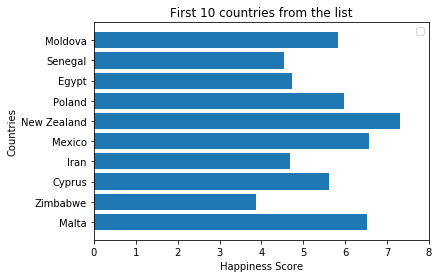

In [28]:
# Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.


justtop10=df.head(10)['Happiness Score']
countrynames=df.head(10)['Country']
plt.barh(countrynames,justtop10)
plt.xlim(0, 8)
plt.ylabel('Countries')
plt.xlabel('Happiness Score')
plt.title('First 10 countries from the list')
plt.legend(loc='upper right')
plt.show()

No handles with labels found to put in legend.


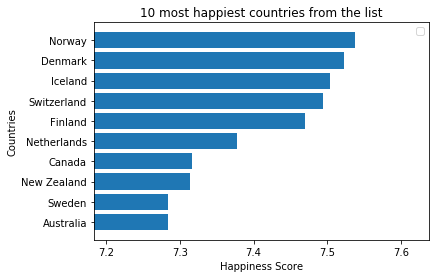

In [29]:
hapvalues=df.sort_values('Happiness Rank').head(10)['Happiness Score'].tolist()
hapvalues.reverse()
countrynamestop=df.sort_values('Happiness Rank').head(10)['Country'].tolist()
countrynamestop.reverse()
max_y=df.sort_values('Happiness Rank').head(10)['Happiness Score'].max()+0.1
min_y=df.sort_values('Happiness Rank').head(10)['Happiness Score'].min()-0.1
plt.barh(countrynamestop,hapvalues)
plt.xlim(min_y, max_y)
plt.ylabel('Countries')
plt.xlabel('Happiness Score')
plt.title('10 most happiest countries from the list')
plt.legend(loc='upper right')
plt.show()

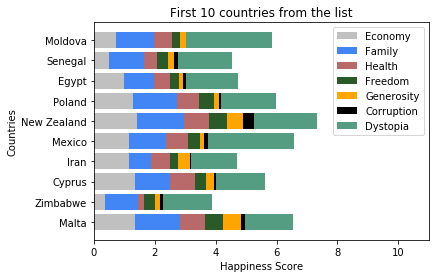

In [30]:
# You will now modify the bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:
# Economy
# Family
# Health
# Freedom
# Generosity
# Corruption
# Dystopia


countrynames=df.head(10)['Country']

Economy=df.head(10)['Economy']
plt.barh(countrynames,Economy, color='silver', left=0, label='Economy')

Family=df.head(10)['Family']
plt.barh(countrynames,Family, color='#4285f4', left=Economy, label='Family')

Health=df.head(10)['Health']
plt.barh(countrynames,Health, color='#b86969', left=Economy+Family, label='Health')

Freedom=df.head(10)['Freedom']
plt.barh(countrynames,Freedom, color='#2a5a28', left=Economy+Family+Health, label='Freedom')

Generosity=df.head(10)['Generosity']
plt.barh(countrynames,Generosity, color='orange', left=Economy+Family+Health+Freedom, label='Generosity')

Corruption=df.head(10)['Corruption']
plt.barh(countrynames,Corruption, color='black', left=Economy+Family+Health+Freedom+Generosity, label='Corruption')

Dystopia=df.head(10)['Dystopia']
plt.barh(countrynames,Dystopia, color='#549c82', left=Economy+Family+Health+Freedom+Generosity+Corruption, label='Dystopia')

plt.xlim(0, 11) # I increased the length of the x axis in order for the legend not to be over the bars.
plt.ylabel('Countries')
plt.xlabel('Happiness Score')
plt.title('First 10 countries from the list')
plt.legend(loc='upper right')
plt.show()

In [31]:
df[df.Region=='Africa'].count()

Country             43
Happiness Rank      43
Happiness Score     43
Economy             43
Family              43
Health              43
Freedom             43
Generosity          43
Corruption          43
Dystopia            43
Job Satisfaction    43
Region              43
dtype: int64

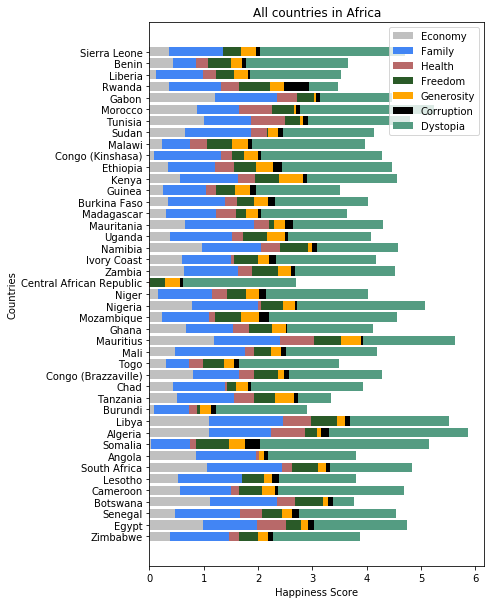

In [32]:
# Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.

plt.figure(figsize=(6,10))

countrynamesA=df[df.Region=='Africa']['Country']

EconomyA=df[df.Region=='Africa']['Economy']
plt.barh(countrynamesA,EconomyA, color='silver', left=0, label='Economy')

FamilyA=df[df.Region=='Africa']['Family']
plt.barh(countrynamesA,FamilyA, color='#4285f4', left=EconomyA, label='Family')

HealthA=df[df.Region=='Africa']['Health']
plt.barh(countrynamesA,HealthA, color='#b86969', left=EconomyA+FamilyA, label='Health')

FreedomA=df[df.Region=='Africa']['Freedom']
plt.barh(countrynamesA,FreedomA, color='#2a5a28', left=EconomyA+FamilyA+HealthA, label='Freedom')

GenerosityA=df[df.Region=='Africa']['Generosity']
plt.barh(countrynamesA,GenerosityA, color='orange', left=EconomyA+FamilyA+HealthA+FreedomA, label='Generosity')

CorruptionA=df[df.Region=='Africa']['Corruption']
plt.barh(countrynamesA,CorruptionA, color='black', left=EconomyA+FamilyA+HealthA+FreedomA+GenerosityA, label='Corruption')

DystopiaA=df[df.Region=='Africa']['Dystopia']
plt.barh(countrynamesA,DystopiaA, color='#549c82', left=EconomyA+FamilyA+HealthA+FreedomA+GenerosityA+CorruptionA, label='Dystopia')

# plt.xlim(0, 8) # I increased the length of the x axis in order for the legend not to be over the bars.
plt.ylabel('Countries')
plt.xlabel('Happiness Score')
plt.title('All countries in Africa')
plt.legend(loc='upper right')
plt.show()


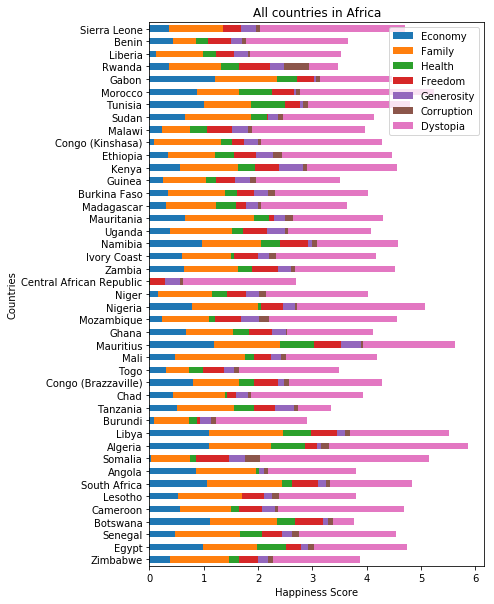

In [33]:
# the same using another approach (it appeared to be much cleaner code, but took more time to figure it out)



dfA=df[df.Region=='Africa']
dfA.set_index('Country', inplace=True)

dfA.loc[:,'Economy':'Dystopia'].plot.barh(stacked=True, figsize=(6,10))
plt.ylabel('Countries')
plt.xlabel('Happiness Score')
plt.title('All countries in Africa')
plt.legend(loc='upper right')
plt.show()

In [34]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


In [38]:
df['Job Satisfaction'].value_counts(bins=6)

(78.2, 86.65]      44
(69.75, 78.2]      36
(86.65, 95.1]      31
(52.85, 61.3]      17
(44.348, 52.85]    12
(61.3, 69.75]      11
Name: Job Satisfaction, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e9f3630>]],
      dtype=object)

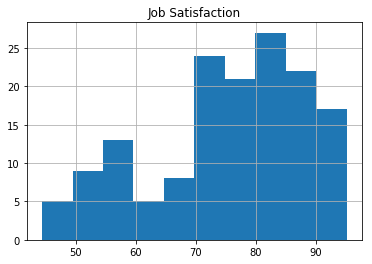

In [39]:
# Obtain a histogram of the Job Satisfaction using the following categories:
df.hist(column='Job Satisfaction');

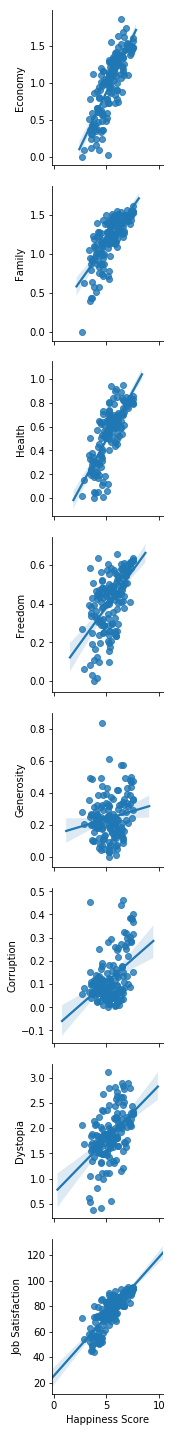

In [71]:
# Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as opposed to separate commands for each plot.

# I did not include 'Happiness Score" vs 'Happiness Rank', as it is obvious.

sns.pairplot(data=df, y_vars=df.columns[3:11], x_vars=['Happiness Score'], kind='reg')

In [110]:
# Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?
# Based on pearson score fo correlation between the variables, the highest correlation for 'Happiness Score' is with 'Job Satisfaction'

df.loc[:,'Happiness Score':'Job Satisfaction'].corr(method='pearson').sort_values('Happiness Score')['Happiness Score']


Generosity          0.164123
Corruption          0.438262
Dystopia            0.481117
Freedom             0.567948
Family              0.749612
Health              0.777731
Economy             0.808678
Job Satisfaction    0.812873
Happiness Score     1.000000
Name: Happiness Score, dtype: float64

In [111]:
df.loc[:,'Happiness Score':'Job Satisfaction'].corr(method='pearson').sort_values('Happiness Score')


,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Generosity,0.164123,-0.015614,0.050771,0.068895,0.319387,1.000000,0.292363,-0.102683,0.220032
Corruption,0.438262,0.358750,0.236262,0.286777,0.501632,0.292363,1.000000,-0.014995,0.337131
Dystopia,0.481117,0.022620,0.075480,0.055886,0.092923,-0.102683,-0.014995,1.000000,0.281655
Freedom,0.567948,0.363843,0.412633,0.340986,1.000000,0.319387,0.501632,0.092923,0.500655
Family,0.749612,0.685524,1.000000,0.606674,0.412633,0.050771,0.236262,0.075480,0.623266
Health,0.777731,0.838884,0.606674,1.000000,0.340986,0.068895,0.286777,0.055886,0.704795
Economy,0.808678,1.000000,0.685524,0.838884,0.363843,-0.015614,0.358750,0.022620,0.700662
Job Satisfaction,0.812873,0.700662,0.623266,0.704795,0.500655,0.220032,0.337131,0.281655,1.000000
Happiness Score,1.000000,0.808678,0.749612,0.777731,0.567948,0.164123,0.438262,0.481117,0.812873


In [114]:
# Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

#First lets' compute the total number of possible outcomes meeting the condition: Happiness score over 6.0
df[df['Happiness Score']>6]['Country'].count()

44

In [125]:
# now let's check how many countries with Happiness score > 6 are from Western Europe. 

df[(df['Happiness Score']>6) & (df.Region=='Western Europe')]['Country'].count()


17

In [127]:
# Thus, the probability that a randomly selected country with Happiness score over 6.0 is from Western Europe is:
# 17/44, or 38,6%
df[(df['Happiness Score']>6) & (df.Region=='Western Europe')]['Country'].count()/df[df['Happiness Score']>6]['Country'].count()

0.38636363636363635

In [124]:
df[df.Country=='Ukraine']['Happiness Score']

73    4.096
Name: Happiness Score, dtype: float64

In [129]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [131]:
df.Country

0                        Malta
1                     Zimbabwe
2                       Cyprus
3                         Iran
4                       Mexico
5                  New Zealand
6                       Poland
7                        Egypt
8                      Senegal
9                      Moldova
10                     Lebanon
11                  Tajikistan
12                  Azerbaijan
13                    Botswana
14                    Cameroon
15                    Malaysia
16                       Qatar
17                     Myanmar
18     Hong Kong S.A.R., China
19                       India
20                     Bolivia
21                      Sweden
22                     Lesotho
23                   Venezuela
24                      Kuwait
25                South Africa
26                      Angola
27                    Slovenia
28                     Somalia
29                     Algeria
                ...           
123                      Spain
124     

In [216]:
# Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

#let's first define an empty matrix (DataFrame) with columns=Regions and indices=Countries
dfnew=pd.DataFrame(columns=df.Region.unique(), index=df.Country.unique())

# and let's fill it with zeros
dfnew.fillna(value=0, inplace=True)

#checking if the matrix is OK

dfnew.head()

# Now let's fill it with valid data from df.
for i in dfnew.index:
    for j in dfnew.columns:
        # print(i,j)
        if (df[df.Country==i]['Region']==j).bool():
            # print(i,j, 'match')
            dfnew.at[i,j]=1
            break

# and let's check the result:

dfnew

,Western Europe,Africa,Eastern Europe,Asia-Pacific,Latin America,North America,Europe
Malta,1,0,0,0,0,0,0
Zimbabwe,0,1,0,0,0,0,0
Cyprus,0,0,1,0,0,0,0
Iran,0,0,0,1,0,0,0
Mexico,0,0,0,0,1,0,0
New Zealand,0,0,0,1,0,0,0
Poland,0,0,1,0,0,0,0
Egypt,0,1,0,0,0,0,0
Senegal,0,1,0,0,0,0,0
Moldova,0,0,1,0,0,0,0
